Classification Project
Why are our customers churning?

Some questions I have include:

Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

### Deliverables:

I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight into why they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.

I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single goolgle slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.

Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.

Specification
Detailed instructions for each section are below.

In general, make sure you document your work. You don't need to explain what every line of code is doing, but you should explain what and why you are doing. For example, if you drop a feature from the dataset, you should explain why you decided to do so, or why that is a reasonable thing to do. If you transform the data in a column, you should explain why you are making that transformation.

In addition, you should not present numers in isolation. If your code outputs a number, be sure you give some context to the number.

### Specific Deliverables:

- a jupyter notebook where your work takes place
- a csv file that predicts churn for each customer
- a python script that prepares data such that it can be fed into your model
- a google slide summarizing your model
- a README.md file that contains a link to your google slides presentation, and instructions for how to use your python script(s)

# Acquisition
Get the data from the customers table from the telco_churn database on the codeup data science database server.

You may wish to join some tables as part of your query.
This data should end up in a pandas data frame.

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import scipy.stats as stats
from scipy.stats import pearsonr

import graphviz
from graphviz import Graph

import telco_prepare
from telco_prepare import prep_telco_data
from telco_prepare import reorder_internet_service_id

# from telco_prepare import peekatdata

import env

In [21]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_telco_data():
    return pd.read_sql('SELECT c.*, ct.contract_type, ist.internet_service_type, pt.payment_type\
    FROM customers as c\
    JOIN contract_types as ct USING (contract_type_id)\
    JOIN internet_service_types as ist USING (internet_service_type_id)\
    JOIN payment_types as pt USING (payment_type_id);', get_connection('telco_churn'))

In [22]:
df1 = get_telco_data()
df1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

- creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
- creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
- creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
- creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
- prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [23]:
df = df1
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [24]:
df = prep_telco_data(df)
df.sample(10).T

,6081,4243,3337,3283,6724,2172,6430,5728,5651,6858
customer_id,1272-ILHFG,8541-QVFKM,4273-MBHYA,4001-TSBTV,4957-SREEC,6258-PVZWJ,0480-KYJVA,3806-YAZOV,2439-QKJUL,7114-AEOZE
gender,Male,Female,Female,Female,Male,Male,Female,Female,Male,Female
senior_citizen,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
dependents,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No
tenure,15,8,1,58,70,68,72,3,5,60
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No,Yes,Yes,No,No,No
internet_service_type_id,0,2,2,2,0,1,0,0,0,0
online_security,No internet service,No,No,No,No internet service,Yes,No internet service,No internet service,No internet service,No internet service


In [4]:
# def peekatdata(dataframe):
    
#     print('df head:')
#     print(dataframe.head())
    
#     print('df tail:')
#     print(dataframe.tail())
    
#     print('df shape:')
#     print(dataframe.shape)
    
#     print('df described:')
#     print(dataframe.describe())
    

# #     index_dtype = 
# #     return index_dtype

#     print('df types:')
#     print(dataframe.dtypes)
    
# peekatdata(df)

In [5]:
# def df_head(dataframe):
    
# #     print('df head:')
#     return dataframe.head()

# def df_tail(dataframe):    
# #     print('df tail:')
#     return dataframe.tail()
    
# def df_shape(dataframe):
# #     print('df shape:')
#     return dataframe.shape

# def df_describe(dataframe):
# #     print('df described:')
#     return dataframe.describe()
    

# # #     index_dtype = 
# # #     return index_dtype

# def df_types(dataframe):
# #     print('df types:')
#     return dataframe.dtypes

# def peekatdata(dataframe):
#     peekatda = df\
#         .pipe(df_head)\
#         .pipe(df_tail)\
#         .pipe(df_describe)\
#         .pipe(df_types)
# #         .pipe(df_shape)\
        
#     return peekatda

In [ ]:
# df_head(df)

In [ ]:
peekatdata(df)

# Data Prep

Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each column. The function should decide whether or not to bin the data for the value counts.

In [94]:
# Need to update with decision to bin.  Function below will give us the features with more than 10 different options, which will be the features we bin.
def df_value_counts(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('-----%s-----' %col)
        print(df[col].value_counts())
        
df_value_counts(df)

-----customer_id-----
3707-GNWHM    1
6445-TNRXS    1
3084-DOWLE    1
4786-UKSNZ    1
5397-TUPSH    1
0384-RVBPI    1
6128-AQBMT    1
3982-DQLUS    1
2894-QOJRX    1
7089-XXAYG    1
8242-SOQUO    1
0690-SRQID    1
2176-OSJUV    1
3262-EIDHV    1
9530-GRMJG    1
3658-QQJYD    1
3500-RMZLT    1
5924-SNGKP    1
9448-REEVD    1
9546-CQJSU    1
2219-MVUSO    1
4160-AMJTL    1
6198-ZFIOJ    1
4806-HIPDW    1
4377-VDHYI    1
6345-HOVES    1
6922-NCEDI    1
7048-GXDAY    1
5680-LQOGP    1
9763-GRSKD    1
             ..
2144-BFDSO    1
6860-YRJZP    1
9916-AYHTC    1
7901-TBKJX    1
9560-BBZXK    1
1447-GIQMR    1
5028-GZLDO    1
2858-EIMXH    1
0164-XAIRP    1
3097-IDVPU    1
1304-SEGFY    1
9408-SSNVZ    1
1074-AMIOH    1
2533-TIBIX    1
2228-BZDEE    1
1897-RCFUM    1
3488-PGMQJ    1
8219-VYBVI    1
3384-CTMSF    1
5293-WXJAK    1
3411-WLRSQ    1
2316-ESMLS    1
5569-IDSEY    1
3329-WDIOK    1
9560-ARGQJ    1
6100-QQHEB    1
5702-KVQRD    1
4000-VGMQP    1
8433-WPJTV    1
8627-EHGIP    1
Na

In [9]:
def df_value_counts_bin(dataframe):
    df_cols = dataframe.columns
    features_to_bin = []
    for col in df_cols:
#         print('-----%s-----' %col)
#         print(df[col].value_counts())
        if df[col].value_counts().count() > 10:
            features_to_bin.append(col)
        print(features_to_bin[-1:])
        
df_value_counts_bin(df)

['customer_id']
['customer_id']
['customer_id']
['customer_id']
['customer_id']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['monthly_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['percent_var_tc_from_act_tc']
['percent_var_tc_from_act_tc']
['tenure_year']
['tenure_year']
['tenure_year']


### Handle Missing Values

Explore the data and see if there are any missing values.

Write a function that accepts a dataframe and returns the names of the columns that have missing values, and the percent of missing values in each column that has missing values.

In [318]:
def missing_values(dataframe):
    df_cols = df.columns
    col_name = []
    null_values = []
    null_percents = []
    for col in df_cols:
        value = df[col].isnull().sum()
        null_percent = value / df[col].count()
        col_name.append(col)
        null_values.append(value)
        null_percents.append(null_percent)

    null_tuples = list(zip(col_name, null_values, null_percents))
    null_df = pd.DataFrame(null_tuples, columns = ['Feature', 'Null_Count', 'Null_Percent'])

    print(type(null_df))
    print(null_df)  
    
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

In [319]:
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

The function below will sort each column and output the head and tail for that column.  This will let us see if there's something fishy about any of data in each column.

In [93]:
def sort_col_val(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head().T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail().T)
        print('-----')

In [11]:
sort_col_val(df)

Sorted by customer_id:
Head:
                   1223        0           2421        2422        2423
customer_id  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ
 
Tail: 
                   1792        4548        1222        2419        2420
customer_id  9987-LUTYD  9992-RRAMN  9992-UJOEL  9993-LHIEB  9995-HOTOH
-----
Sorted by gender:
Head:
          3521    5577    2895    2897    2899
gender  Female  Female  Female  Female  Female
 
Tail: 
        3095  3094  3092  3122  7042
gender  Male  Male  Male  Male  Male
-----
Sorted by senior_citizen:
Head:
                0     4703  4702  4701  4700
senior_citizen     0     0     0     0     0
 
Tail: 
                4542  4540  4537  2259  5117
senior_citizen     1     1     1     1     1
-----
Sorted by partner:
Head:
        0    3776 3775 3773 3772
partner   No   No   No   No   No
 
Tail: 
        4104 1385 4107 4087 7042
partner  Yes  Yes  Yes  Yes  Yes
-----
Sorted by dependents:
Head:
           0    4065 4063 4062 406

Looking at the above output, something seems odd about the lower end of total_charges.  Below, I am checking for values that are whitespace, or ' '.  We have 11 rows without an actual amount in total_charges.

In [322]:
df['total_charges'].replace(' ', (df['monthly_charges'] * df['tenure']), inplace=True)

In [323]:
df.loc[(df['total_charges'] == ' ')].T

""
customer_id
gender
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
internet_service_type_id
online_security


We are now showing no empty cells.  Let's do a value_count to if anything strange is in our list now.  They are showing as 0.0 now.  Let's convert the total_charges column to a float and then drop these rows.

In [92]:
df_value_counts(df)

NameError: name 'df_value_counts' is not defined

In [325]:
df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)
df.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

Success!  Total_charges is now a float.  Let's drop the rows with 0.0.

In [326]:
df = df.drop(df[df.total_charges == 0].index)

In [327]:
df.sort_values(by=['total_charges']).head().T

,6145,6010,5989,6039,5589
customer_id,2967-MXRAV,9318-NKNFC,8992-CEUEN,9975-SKRNR,1423-BMPBQ
gender,Male,Male,Female,Male,Female
senior_citizen,0,0,0,0,0
partner,Yes,No,No,No,Yes
dependents,Yes,No,No,No,Yes
tenure,1,1,1,1,1
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
internet_service_type_id,3,3,3,3,3
online_security,No internet service,No internet service,No internet service,No internet service,No internet service


Let's create a feature that calculates estimated total_charges based on tenure * monthly_charges and gives us a percentage vs. the actual total_charges.  This will be used to check for data integrity issues.

In [328]:
df['percent_var_tc_from_act_tc'] = (df['monthly_charges'] * df['tenure']) / df['total_charges']

In [329]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,percent_var_tc_from_act_tc
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,1.872582,1.688567,2.315557,64.798208,2283.300441,1.002311
std,0.368844,24.545260,0.737271,0.832934,1.149523,30.085974,2266.771362,0.051288
min,0.000000,1.000000,1.000000,1.000000,1.000000,18.250000,18.800000,0.635545
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.587500,401.450000,0.980813
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1397.475000,1.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.862500,3794.737500,1.020881
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,1.450628


To make things a little clearer, let's reorganize the columns so the new columns created are closer to the columns they represent/interact with.

Document your takeaways. For each variable:

- should you remove the observations with a missing value for that variable?
- should you remove the variable altogether?
- is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
- should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a - result of data integrity issues and should be replaced by the most likely value?)
- Handle the missing values in the way you recommended above.

Transform churn such that "yes" = 1 and "no" = 0

In [330]:
def encode_churn(df):
    encoder = LabelEncoder()
    encoder.fit(df.churn)
    return df.assign(churn_encoded = encoder.transform(df.churn))

In [331]:
df = encode_churn(df)

In [332]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,percent_var_tc_from_act_tc,churn_encoded
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,2,59.9,542.40,No,Month-to-month,DSL,Mailed check,0.993916,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1.093009,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check,0.991332,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,Yes,1,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,1.000000,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,3,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),1.000000,1


Let's encode multiple_lines.

In [31]:
def encode_multiple_lines(df):
    encoder = LabelEncoder()
    encoder.fit(df.multiple_lines)
    return df.assign(multiple_lines_encoded = encoder.transform(df.multiple_lines))

In [32]:
df = encode_multiple_lines(df)

In [33]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type,internet_service_type,payment_type,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,monthly_charges_binned,multiple_lines_encoded
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Month-to-month,DSL,Mailed check,0.993916,0,0.750000,0,2,3,2
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Month-to-month,DSL,Credit card (automatic),1.093009,0,0.750000,0,1,4,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,Month-to-month,DSL,Electronic check,0.991332,0,0.583333,0,1,2,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,Month-to-month,DSL,Electronic check,1.000000,1,0.083333,0,0,1,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,Month-to-month,DSL,Bank transfer (automatic),1.000000,1,0.083333,0,0,1,1


Compute a new feature, tenure_year, that is a result of translating tenure from months to years.

In [336]:
def create_tenure_year(df):
    df[['tenure_year']] = df[['tenure']] / 12
    return df

In [337]:
create_tenure_year(df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,percent_var_tc_from_act_tc,churn_encoded,multiple_lines_encoded,tenure_year
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,59.90,542.40,No,Month-to-month,DSL,Mailed check,0.993916,0,2,0.750000
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic),1.093009,0,0,0.750000
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,48.20,340.35,No,Month-to-month,DSL,Electronic check,0.991332,0,0,0.583333
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.10,25.10,Yes,Month-to-month,DSL,Electronic check,1.000000,1,1,0.083333
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.50,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),1.000000,1,1,0.083333
5,0067-DKWBL,Male,1,No,No,2,Yes,No,1,Yes,...,49.25,91.10,Yes,Month-to-month,DSL,Electronic check,1.081229,1,0,0.166667
6,0076-LVEPS,Male,0,No,Yes,29,No,No phone service,1,Yes,...,45.00,1242.45,No,Month-to-month,DSL,Mailed check,1.050344,0,1,2.416667
7,0082-LDZUE,Male,0,No,No,1,Yes,No,1,No,...,44.30,44.30,No,Month-to-month,DSL,Mailed check,1.000000,0,0,0.083333
8,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,1,No,...,50.35,314.55,No,Month-to-month,DSL,Electronic check,0.960420,0,2,0.500000
9,0096-FCPUF,Male,0,No,No,30,Yes,Yes,1,Yes,...,64.50,1888.45,No,Month-to-month,DSL,Mailed check,1.024650,0,2,2.500000


### Creating a new feature that will bin the tenure years into int's.

In [338]:
df[['tenure_yr_int']] = df[['tenure_year']].astype(int)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,total_charges,churn,contract_type,internet_service_type,payment_type,percent_var_tc_from_act_tc,churn_encoded,multiple_lines_encoded,tenure_year,tenure_yr_int
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,542.40,No,Month-to-month,DSL,Mailed check,0.993916,0,2,0.750000,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,571.45,No,Month-to-month,DSL,Credit card (automatic),1.093009,0,0,0.750000,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,340.35,No,Month-to-month,DSL,Electronic check,0.991332,0,0,0.583333,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.10,Yes,Month-to-month,DSL,Electronic check,1.000000,1,1,0.083333,0
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),1.000000,1,1,0.083333,0


In [25]:
df[['monthly_charges_binned']] = df[['monthly_charges']]
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup,monthly_charges_binned
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,0.993916,0,0.750000,0,2,7,0,1,0,59.9
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,1.093009,0,0.750000,0,1,4,1,3,0,69.4
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,0.991332,0,0.583333,0,1,4,0,0,2,48.2
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1.000000,1,0.083333,0,0,1,0,0,0,25.1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,1.000000,1,0.083333,0,0,1,3,0,2,30.5


In [26]:
bins = [15,40, 50, 60, 70, 80, 90, 100, 140]
labels = [1,2,3,4,5,6,7,8]
df['monthly_charges_binned'] = pd.cut(df['monthly_charges'], bins=bins, labels=labels)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup,monthly_charges_binned
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,0.993916,0,0.750000,0,2,7,0,1,0,3
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,1.093009,0,0.750000,0,1,4,1,3,0,4
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,0.991332,0,0.583333,0,1,4,0,0,2,2
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1.000000,1,0.083333,0,0,1,0,0,0,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,1.000000,1,0.083333,0,0,1,3,0,2,1


In [37]:
df.sample(10).T

,2270,1386,4393,2058,490,1174,6442,1759,139,2704
customer_id,7639-LIAYI,2890-WFBHU,9314-IJWSQ,4676-WLUHT,4072-IPYLT,9554-DFKIC,0613-WUXUM,9388-ZEYVT,1310-QRITU,1363-TXLSL
gender,Male,Female,Female,Male,Female,Male,Female,Male,Female,Male
senior_citizen,0,0,0,0,0,0,0,0,0,1
partner,No,No,Yes,No,Yes,Yes,Yes,No,No,Yes
dependents,No,No,Yes,No,Yes,Yes,Yes,No,No,No
tenure,52,59,14,54,36,30,70,43,18,1
phone_service,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,Yes,No phone service,No,Yes,No,No phone service,Yes,No
internet_service_type_id,1,1,2,1,1,1,0,1,1,2
online_security,Yes,Yes,No,Yes,Yes,Yes,No internet service,No,No,No


Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.

Figure out a way to capture the information contained in dependents and partner into a single variable of dtype int. Transform the data and place in a new column household_type_id.

Figure out a way to capture the information contained in streaming_tv and streaming_movies into a single variable of dtype int. Transform the data and place in a new column streaming_services.

Figure out a way to capture the information contained in online_security and online_backup into a single variable of dtype int. Transform the data and place in a new column online_security_backup.

Split the data into train (70%) & test (30%) samples.

In [27]:
list(df)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'percent_var_tc_from_act_tc',
 'churn_encoded',
 'tenure_year',
 'tenure_yr_int',
 'phone_id',
 'combined_service_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup',
 'monthly_charges_binned']

In [7]:
df = prep_telco_data(df)

In [8]:
df.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                        object
dependents                     object
tenure                          int64
phone_service                  object
multiple_lines                 object
internet_service_type_id        int64
online_security                object
online_backup                  object
device_protection              object
tech_support                   object
streaming_tv                   object
streaming_movies               object
contract_type_id                int64
paperless_billing              object
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                          object
contract_type                  object
internet_service_type          object
payment_type                   object
percent_var_tc_from_act_tc    float64
churn_encoded                   int64
tenure_year 

In [28]:
X = df.drop(['churn', 'churn_encoded'], axis=1)
y = df[['churn_encoded']]

### End of Data Prep

In [29]:
train, test = train_test_split(df, train_size=0.80, random_state=123)

In [30]:
train.shape

(5634, 34)

In [31]:
test.shape

(1409, 34)

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(train[['monthly_charges', 'total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,combined_service_id,household_type_id,streaming_services,online_security_backup,monthly_charges_binned
6924,8148-NLEGT,Female,0,Yes,Yes,42,Yes,Yes,0,No internet service,...,0.950357,0,3.500000,3,2,6,3,0,0,1
5249,3831-YCPUO,Female,0,Yes,Yes,72,Yes,No,2,Yes,...,1.003705,0,6.000000,6,1,5,3,3,3,8
5852,6141-OOXUQ,Male,0,No,No,1,Yes,No,0,No internet service,...,1.000000,1,0.083333,0,1,3,0,0,0,1
3597,5380-WJKOV,Male,0,No,No,34,Yes,Yes,2,No,...,1.018779,1,2.833333,2,2,8,0,3,1,8
4147,8016-NCFVO,Male,1,No,No,55,Yes,Yes,2,Yes,...,1.003909,0,4.583333,4,2,8,0,3,3,8


In [35]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

Variable Encoding: encode the values in each non-numeric feature such that they are numeric.

Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling are learned from the training data set.

# Data Exploration
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

Each independent variable (except for customer_id) should be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.

For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.

Use subplots when plotting the same type of chart but with different variables.

Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)

Add annotations to at least 5 plots with a key takeaway from that plot.

Use plots from matplotlib, pandas and seaborn.

Use each of the following:

sns.heatmap

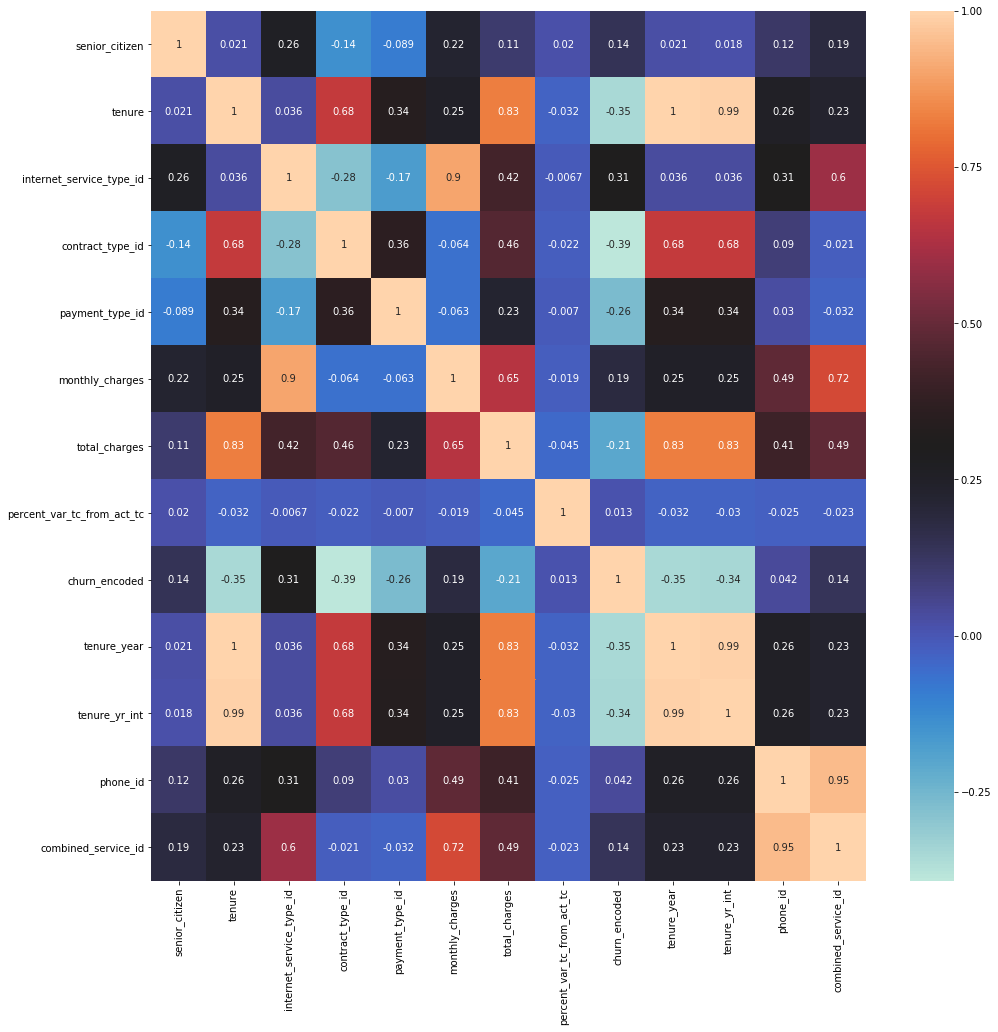

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), cmap='icefire', annot=True)

pd.crosstab (along with sns.heatmap)

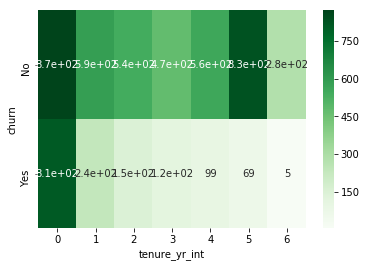

In [18]:
cross_tab = pd.crosstab(train.churn, train.tenure_yr_int)

sns.heatmap(cross_tab, annot=True, cmap='Greens')

This crosstab plot again shows that most churn customers are not up to the 1 year tenure mark.

pd.scatter_matrix

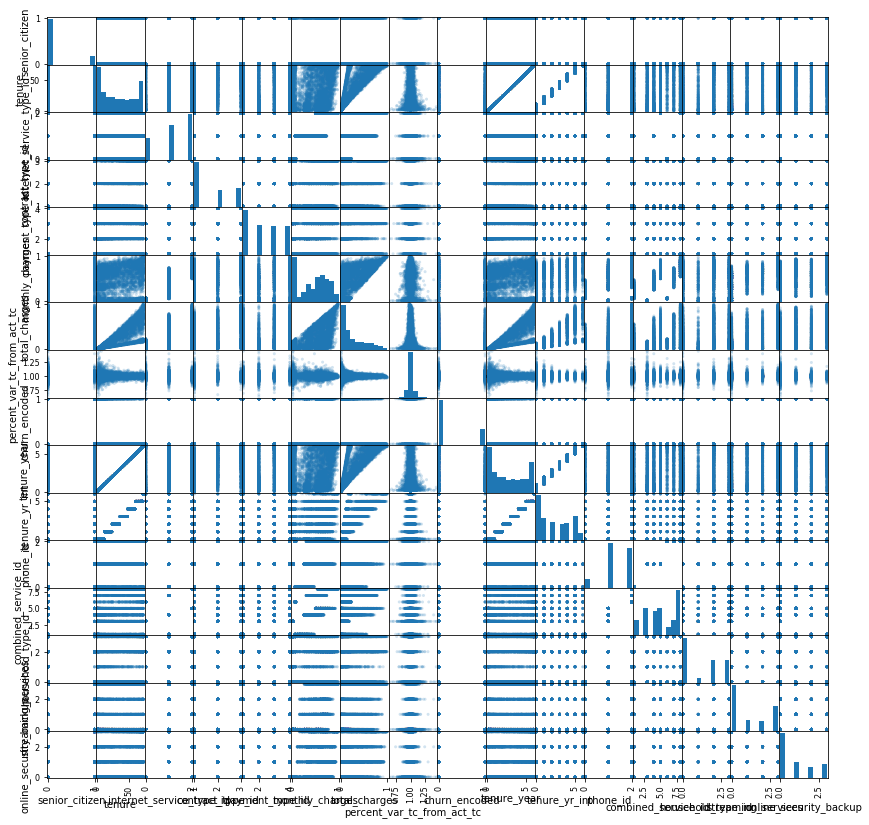

In [19]:
pd.scatter_matrix(train, alpha=0.2, figsize=(14, 14))
plt.show()

sns.barplot

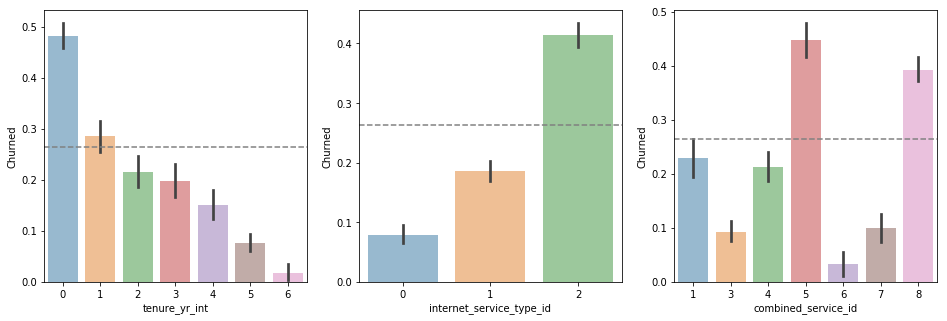

In [18]:
features = ['tenure_yr_int', 'internet_service_type_id', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    ax[i].axhline(churned_rate, ls='--', color='grey')
    

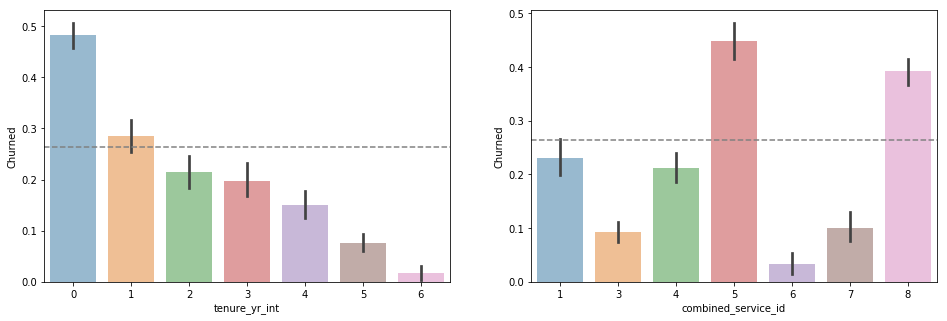

In [139]:
features = ['tenure_yr_int', 'combined_service_id']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    ax[i].axhline(churned_rate, ls='--', color='grey')

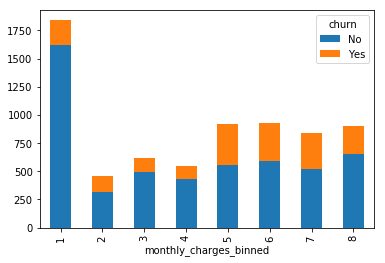

In [36]:
df.groupby(['monthly_charges_binned', 'churn']).size().unstack().plot(kind='bar', stacked=True)

These plots show that customers that have not yet reached 1 year of tenure churn more.  Customers with fiber churn more.  Month-to-month customers are churning more.  Finally, the customers with the higher monthly charges are churning more frequently.

sns.swarmplot

sns.pairplot

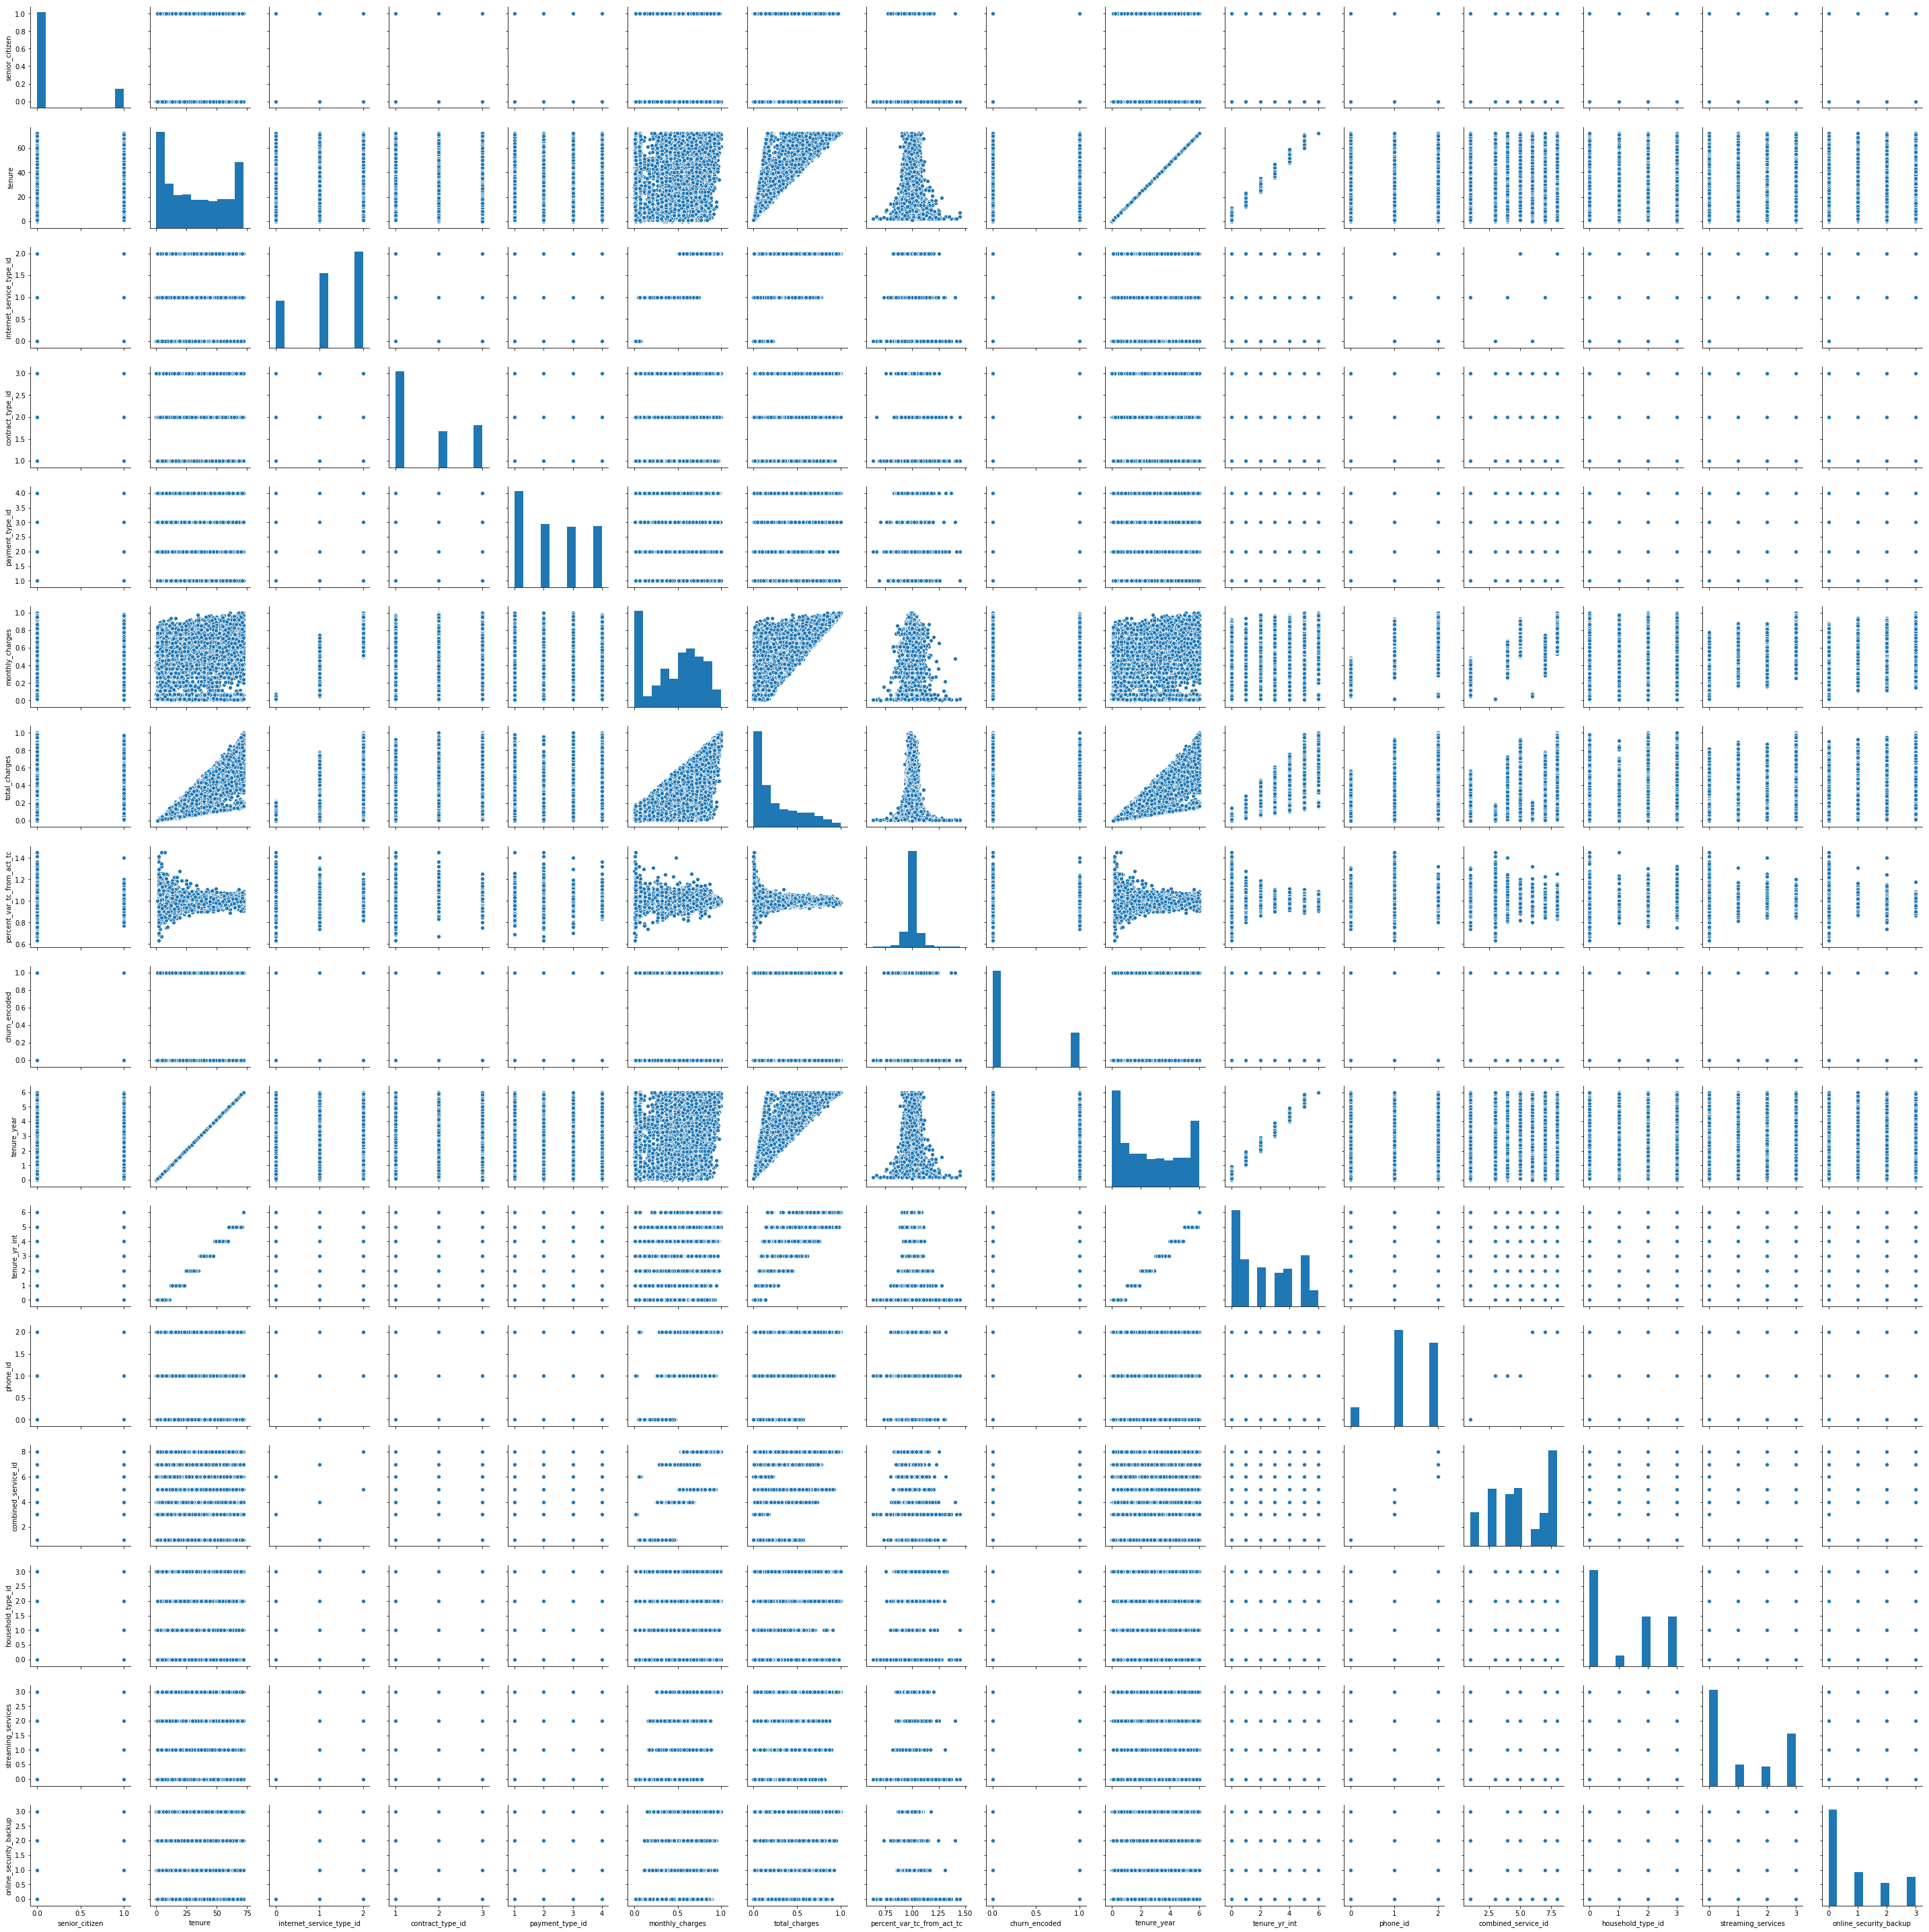

In [25]:
sns.pairplot(train)

It's hard to see anything with the charts above.

sns.jointplot

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


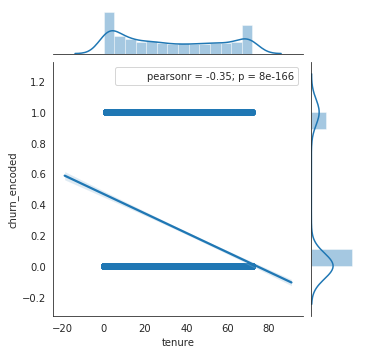

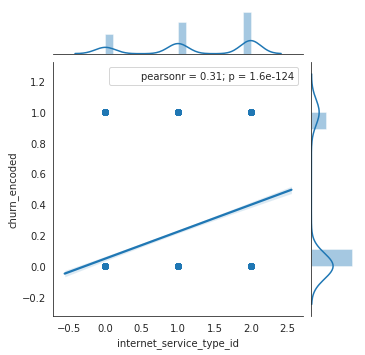

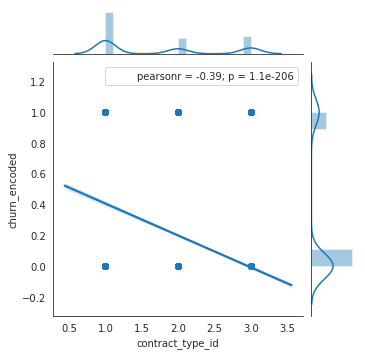

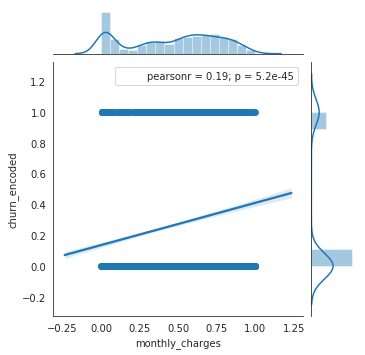

In [57]:
for i, col in enumerate(['tenure', 'internet_service_type_id', 'contract_type_id', 'monthly_charges']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = train[col]
        j = sns.jointplot(train[col], 'churn_encoded', data=train, kind='reg', height=5)
        j.annotate(stats.pearsonr)

sns.relplot or plt.scatter

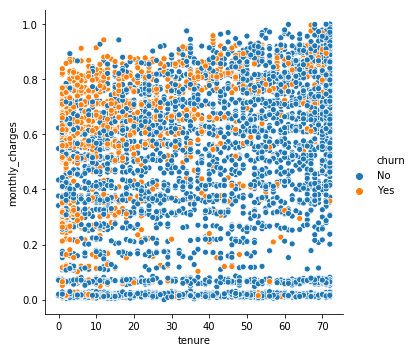

In [19]:
sns.relplot(x='tenure', y='monthly_charges', hue='churn', data=train)

With the plot above, we can see churn located more towards the higher monthly charge customers as well as lower tenure.

sns.distplot or plt.hist

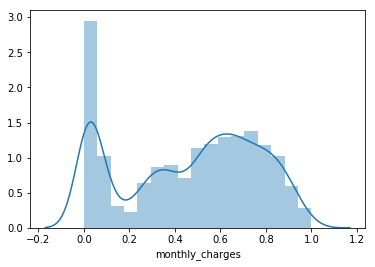

In [20]:
sns.distplot(train.monthly_charges)

With the graph above, we can see a large volume of customers paying monthly charges on the lower end and a large amount paying towards, but not quite the higher end.  The group close to the upper end are the customer churning more.  They carry a lot of weight on overall monthly revenue.

sns.boxplot

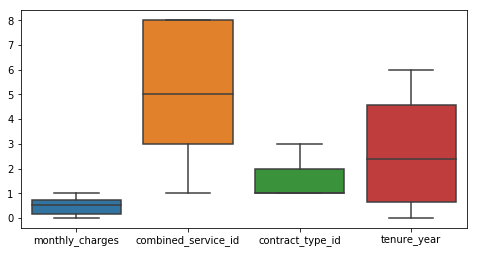

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train[['monthly_charges', 'combined_service_id', 'contract_type_id', 'tenure_year']])

plt.plot

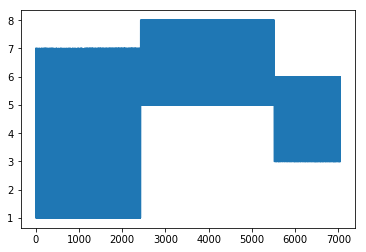

In [29]:
# x = df.tenure_year
# y = df.monthly_charges
# plt.plot(x, y)
x = df.combined_service_id
plt.plot(x)

In [21]:
train.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                        object
dependents                     object
tenure                          int64
phone_service                  object
multiple_lines                 object
internet_service_type_id        int64
online_security                object
online_backup                  object
device_protection              object
tech_support                   object
streaming_tv                   object
streaming_movies               object
contract_type_id                int64
paperless_billing              object
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                          object
contract_type                  object
internet_service_type          object
payment_type                   object
percent_var_tc_from_act_tc    float64
churn_encoded                   int64
tenure_year 

Use at least one more type of plot that is not included in the list above.

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

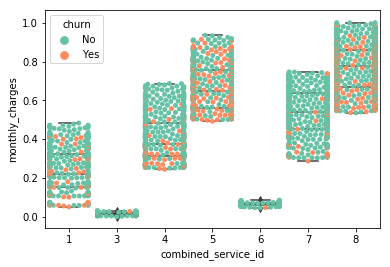

In [18]:
sns.swarmplot(x="combined_service_id", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="combined_service_id", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

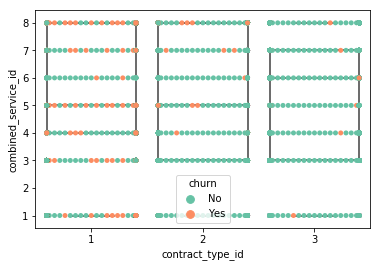

In [19]:
sns.swarmplot(x="contract_type_id", y="combined_service_id", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="contract_type_id", y="combined_service_id", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

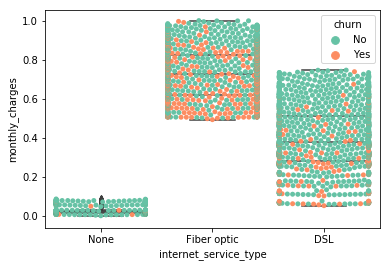

In [141]:
sns.swarmplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="internet_service_type", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

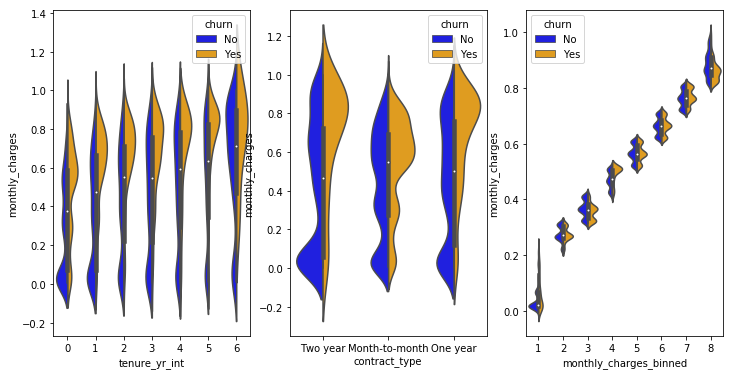

In [28]:
features = ['tenure_yr_int', 'contract_type', 'monthly_charges_binned']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

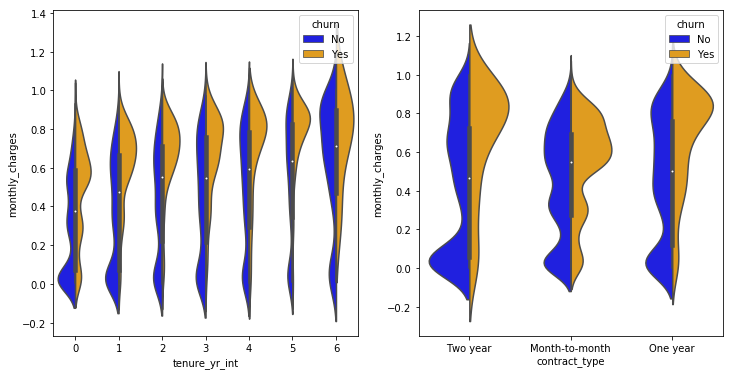

In [140]:
features = ['tenure_yr_int', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

The plots above show that higher monthly charges are a good indicator of customer that are churning.  This is consistent across tenure years and contract type.

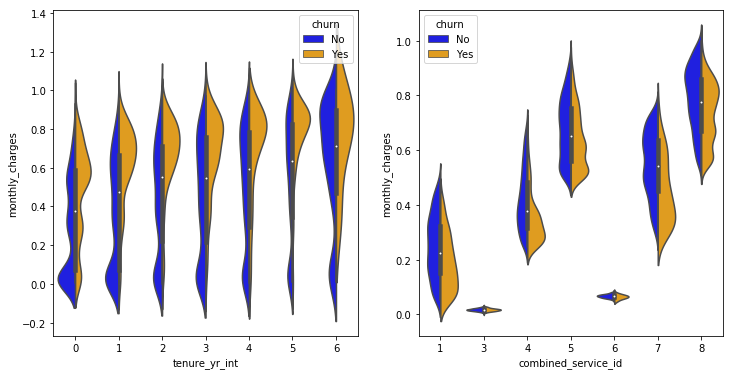

In [17]:
features = ['tenure_yr_int', 'combined_service_id']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

# Modeling
Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove them.

Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

In [211]:
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


In [34]:
list(df)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'percent_var_tc_from_act_tc',
 'churn_encoded',
 'tenure_year',
 'tenure_yr_int',
 'phone_id',
 'monthly_charges_binned',
 'multiple_lines_encoded']

In [35]:
service_type = df[['internet_service_type_id', 'multiple_lines_encoded']]
service_type.head(10)

,internet_service_type_id,multiple_lines_encoded
0,1,2
1,1,0
2,1,0
3,1,1
4,1,1
5,1,0
6,1,1
7,1,0
8,1,2
9,1,2


In [36]:
service_type.dtypes

internet_service_type_id    int64
multiple_lines_encoded      int64
dtype: object

In [37]:
service_type['internet_service_type_id'] = service_type['internet_service_type_id'].apply(str)

In [38]:
service_type['multiple_lines_encoded'] = service_type['multiple_lines_encoded'].apply(str)

In [39]:
service_type.dtypes

internet_service_type_id    object
multiple_lines_encoded      object
dtype: object

In [40]:
service_type_df = service_type['internet_service_type_id'] + service_type['multiple_lines_encoded']
service_type_df.head(15)

0     12
1     10
2     10
3     11
4     11
5     10
6     11
7     10
8     12
9     12
10    12
11    11
12    11
13    10
14    10
dtype: object

In [41]:
print(type(service_type_df))

<class 'pandas.core.series.Series'>


In [42]:
service_type_df = service_type_df.to_frame(name='cust_serv_type')
service_type_df.head()

,cust_serv_type
0,12
1,10
2,10
3,11
4,11


In [43]:
df = pd.concat([df, service_type_df], axis=1)
df.head().T
    
    
    

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


In [267]:
# df = df.drop(['cust_serv_type'], axis=1)

In [44]:
df[['cust_serv_type']] = df[['cust_serv_type']].astype(int)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,internet_service_type,payment_type,percent_var_tc_from_act_tc,churn_encoded,tenure_year,tenure_yr_int,phone_id,monthly_charges_binned,multiple_lines_encoded,cust_serv_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,DSL,Mailed check,0.993916,0,0.750000,0,2,3,2,12
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,DSL,Credit card (automatic),1.093009,0,0.750000,0,1,4,0,10
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,DSL,Electronic check,0.991332,0,0.583333,0,1,2,0,10
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,DSL,Electronic check,1.000000,1,0.083333,0,0,1,1,11
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,DSL,Bank transfer (automatic),1.000000,1,0.083333,0,0,1,1,11


In [293]:
df.dtypes

customer_id                     object
gender                          object
senior_citizen                   int64
partner                         object
dependents                      object
tenure                           int64
phone_service                   object
multiple_lines                  object
internet_service_type_id         int64
online_security                 object
online_backup                   object
device_protection               object
tech_support                    object
streaming_tv                    object
streaming_movies                object
contract_type_id                 int64
paperless_billing               object
payment_type_id                  int64
monthly_charges                float64
total_charges                  float64
churn                           object
contract_type                   object
internet_service_type           object
payment_type                    object
percent_var_tc_from_act_tc     float64
churn_encoded            

In [51]:
df.sample(10).T

,6474,1846,2325,4895,3309,849,166,1695,2295,1860
customer_id,1098-KFQEC,0771-CHWSK,8413-YNHNV,6305-YLBMM,4128-ETESU,6898-MDLZW,1492-QGCLU,8220-OCUFY,8069-RHUXK,0988-AADSA
gender,Female,Male,Male,Male,Female,Male,Male,Female,Female,Female
senior_citizen,0,0,0,0,1,0,0,0,0,0
partner,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,No,Yes,No,Yes,Yes
tenure,55,66,69,69,47,12,53,21,67,72
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
multiple_lines,No,Yes,Yes,No,Yes,No,Yes,No,No phone service,Yes
internet_service_type_id,0,1,1,2,2,1,1,1,1,1
online_security,No internet service,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes


# Models

The following cell contains our X variables that we will use to create models.  The features being used in that particular X are highlighted in the list.

In [95]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

X_rf_2_train = X_train[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]
X_rf_2_test = X_test[['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']]

X_rf_3_train = X_train[['tenure_year', 'monthly_charges_binned', 'contract_type_id', 'combined_service_id']]
X_rf_3_test = X_test[['tenure_year', 'monthly_charges_binned', 'contract_type_id', 'combined_service_id']]


## Random Forests - RF will not be used as we will want to be able to explain our model and how it categorizes each customer.

In [98]:
def analyze_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('Accuracy of RF classifier on train set: {:.6f}'
     .format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    print(rf.feature_importances_)
    

The following models all use X_rf_1 which uses tenure_year, monthly_charges, and internet_service_type_id.

In [97]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5, 6)

Results using entropy as the measure of impurity and 6 as max depth level and 5 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.97232302 0.02767698]
 [0.95240745 0.04759255]
 [0.67547271 0.32452729]
 [0.57494857 0.42505143]
 [0.89234935 0.10765065]]
-----
Accuracy of rf classifier on training set: 0.80209443
-----
          Pred -  Pred +
Actual -    3788     361
Actual +     754     731
-----
              precision    recall  f1-score   support

           0     0.8340    0.9130    0.8717      4149
           1     0.6694    0.4923    0.5673      1485

   micro avg     0.8021    0.8021    0.8021      5634
   macro avg     0.7517    0.7026    0.7195      5634
weighted avg     0.7906    0.8021    0.7915      5634

-----
Accuracy of RF classifier on train set: 0.802094
-----
[0.50059968 0.26970294 0.22969738]


In [243]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 8, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 8 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.97385524 0.02614476]
 [0.97554294 0.02445706]
 [0.44040274 0.55959726]
 [0.92871967 0.07128033]
 [0.97680928 0.02319072]]
-----
Accuracy of rf classifier on training set: 0.81066667
-----
          Pred -  Pred +
Actual -    3810     323
Actual +     742     750
-----
              precision    recall  f1-score   support

           0     0.8370    0.9218    0.8774      4133
           1     0.6990    0.5027    0.5848      1492

   micro avg     0.8107    0.8107    0.8107      5625
   macro avg     0.7680    0.7123    0.7311      5625
weighted avg     0.8004    0.8107    0.7998      5625

-----
Accuracy of RF classifier on train set: 0.810667
-----


## Best performing model on train, also did well on test.

In [244]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.9758168  0.0241832 ]
 [0.97644695 0.02355305]
 [0.46372353 0.53627647]
 [0.94565517 0.05434483]
 [0.96984549 0.03015451]]
-----
Accuracy of rf classifier on training set: 0.81564444
-----
          Pred -  Pred +
Actual -    3828     305
Actual +     732     760
-----
              precision    recall  f1-score   support

           0     0.8395    0.9262    0.8807      4133
           1     0.7136    0.5094    0.5944      1492

   micro avg     0.8156    0.8156    0.8156      5625
   macro avg     0.7765    0.7178    0.7376      5625
weighted avg     0.8061    0.8156    0.8048      5625

-----
Accuracy of RF classifier on train set: 0.815644
-----


## Test on RF model that performed best on train set.

In [53]:
def test_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(rf.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test

In [245]:
test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.9758168  0.0241832 ]
 [0.97644695 0.02355305]
 [0.46372353 0.53627647]
 [0.94565517 0.05434483]
 [0.96984549 0.03015451]]
-----
Accuracy of rf classifier on training set: 0.81564444
-----
          Pred -  Pred +
Actual -    3828     305
Actual +     732     760
-----
              precision    recall  f1-score   support

           0     0.8395    0.9262    0.8807      4133
           1     0.7136    0.5094    0.5944      1492

   micro avg     0.8156    0.8156    0.8156      5625
   macro avg     0.7765    0.7178    0.7376      5625
weighted avg     0.8061    0.8156    0.8048      5625

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     940      90
Actua

array([[0.99302016, 0.00697984],
       [0.48779996, 0.51220004],
       [0.99313618, 0.00686382],
       ...,
       [0.45011787, 0.54988213],
       [0.77355985, 0.22644015],
       [0.92232579, 0.07767421]])

#### The following use X2

In [284]:
analyze_rf_binomial(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'cust_serv_type']
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.99449545 0.00550455]
 [0.94774995 0.05225005]
 [0.44600947 0.55399053]
 [0.97604681 0.02395319]
 [0.99536128 0.00463872]]
-----
Accuracy of rf classifier on training set: 0.82026667
-----
          Pred -  Pred +
Actual -    3792     341
Actual +     670     822
-----
              precision    recall  f1-score   support

           0     0.8498    0.9175    0.8824      4133
           1     0.7068    0.5509    0.6192      1492

   micro avg     0.8203    0.8203    0.8203      5625
   macro avg     0.7783    0.7342    0.7508      5625
weighted avg     0.8119    0.8203    0.8126      5625

-----
Accuracy of RF classifier on train set: 0.820267
-----


In [285]:
test_rf_binomial(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'cust_serv_type']
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.99449545 0.00550455]
 [0.94774995 0.05225005]
 [0.44600947 0.55399053]
 [0.97604681 0.02395319]
 [0.99536128 0.00463872]]
-----
Accuracy of rf classifier on training set: 0.82026667
-----
          Pred -  Pred +
Actual -    3792     341
Actual +     670     822
-----
              precision    recall  f1-score   support

           0     0.8498    0.9175    0.8824      4133
           1     0.7068    0.5509    0.6192      1492

   micro avg     0.8203    0.8203    0.8203      5625
   macro avg     0.7783    0.7342    0.7508      5625
weighted avg     0.8119    0.8203    0.8126      5625

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     923    

array([[0.9975009 , 0.0024991 ],
       [0.52470145, 0.47529855],
       [0.99554457, 0.00445543],
       ...,
       [0.45824429, 0.54175571],
       [0.82815842, 0.17184158],
       [0.93138237, 0.06861763]])

## Classification/Decision Tree

In [120]:
def analyze_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')

#### The following models all use X_rf_1 which uses tenure_year, monthly_charges, and internet_service_type_id.

In [121]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.96721311 0.03278689]
 [0.65734266 0.34265734]
 [0.57884972 0.42115028]
 [0.66666667 0.33333333]]
-----
          Pred -  Pred +
Actual -    3782     367
Actual +     771     714
-----
              precision    recall  f1-score   support

           0     0.8307    0.9115    0.8692      4149
           1     0.6605    0.4808    0.5565      1485

   micro avg     0.7980    0.7980    0.7980      5634
   macro avg     0.7456    0.6962    0.7129      5634
weighted avg     0.7858    0.7980    0.7868      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79801207
-----


In [122]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 7)

Results using gini as the measure of impurity and 7 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.9929078  0.0070922 ]
 [1.         0.        ]
 [0.62698413 0.37301587]
 [0.52808989 0.47191011]
 [0.70454545 0.29545455]]
-----
          Pred -  Pred +
Actual -    3837     312
Actual +     744     741
-----
              precision    recall  f1-score   support

           0     0.8376    0.9248    0.8790      4149
           1     0.7037    0.4990    0.5839      1485

   micro avg     0.8126    0.8126    0.8126      5634
   macro avg     0.7706    0.7119    0.7315      5634
weighted avg     0.8023    0.8126    0.8013      5634

-----
Accuracy of Decision Tree classifier on training set: 0.81256656
-----


In [123]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98135198 0.01864802]
 [0.98947368 0.01052632]
 [0.65734266 0.34265734]
 [0.58333333 0.41666667]
 [0.66666667 0.33333333]]
-----
          Pred -  Pred +
Actual -    3773     376
Actual +     766     719
-----
              precision    recall  f1-score   support

           0     0.8312    0.9094    0.8686      4149
           1     0.6566    0.4842    0.5574      1485

   micro avg     0.7973    0.7973    0.7973      5634
   macro avg     0.7439    0.6968    0.7130      5634
weighted avg     0.7852    0.7973    0.7865      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79730209
-----


In [124]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 7)

Results using entropy as the measure of impurity and 7 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.62698413 0.37301587]
 [0.55882353 0.44117647]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3818     331
Actual +     748     737
-----
              precision    recall  f1-score   support

           0     0.8362    0.9202    0.8762      4149
           1     0.6901    0.4963    0.5774      1485

   micro avg     0.8085    0.8085    0.8085      5634
   macro avg     0.7631    0.7083    0.7268      5634
weighted avg     0.7977    0.8085    0.7974      5634

-----
Accuracy of Decision Tree classifier on training set: 0.80848420
-----


#### The following models all use X_rf_2 which uses tenure_year, monthly_charges, and cust_serv_type.

In [125]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.98349057 0.01650943]
 [0.8974359  0.1025641 ]
 [0.62589928 0.37410072]
 [0.51757812 0.48242188]
 [0.71717172 0.28282828]]
-----
          Pred -  Pred +
Actual -    3827     322
Actual +     833     652
-----
              precision    recall  f1-score   support

           0     0.8212    0.9224    0.8689      4149
           1     0.6694    0.4391    0.5303      1485

   micro avg     0.7950    0.7950    0.7950      5634
   macro avg     0.7453    0.6807    0.6996      5634
weighted avg     0.7812    0.7950    0.7796      5634

-----
Accuracy of Decision Tree classifier on training set: 0.79499468
-----


In [126]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'gini', 7)

Results using gini as the measure of impurity and 7 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[0.98778999 0.01221001]
 [0.83333333 0.16666667]
 [0.55263158 0.44736842]
 [0.48760331 0.51239669]
 [0.94444444 0.05555556]]
-----
          Pred -  Pred +
Actual -    3765     384
Actual +     695     790
-----
              precision    recall  f1-score   support

           0     0.8442    0.9074    0.8747      4149
           1     0.6729    0.5320    0.5942      1485

   micro avg     0.8085    0.8085    0.8085      5634
   macro avg     0.7585    0.7197    0.7344      5634
weighted avg     0.7990    0.8085    0.8007      5634

-----
Accuracy of Decision Tree classifier on training set: 0.80848420
-----


In [127]:
analyze_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 8)

Results using entropy as the measure of impurity and 8 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.9845815  0.0154185 ]
 [1.         0.        ]
 [0.61904762 0.38095238]
 [0.56818182 0.43181818]
 [0.8        0.2       ]]
-----
          Pred -  Pred +
Actual -    3767     382
Actual +     653     832
-----
              precision    recall  f1-score   support

           0     0.8523    0.9079    0.8792      4149
           1     0.6853    0.5603    0.6165      1485

   micro avg     0.8163    0.8163    0.8163      5634
   macro avg     0.7688    0.7341    0.7479      5634
weighted avg     0.8083    0.8163    0.8100      5634

-----
Accuracy of Decision Tree classifier on training set: 0.81629393
-----


#### The following models all use X_rf_3 which uses tenure_year, monthly_charges, and cust_serv_type.

In [129]:
analyze_classification_model(X_rf_3_train, X_rf_3_test, y_train, y_test, 'entropy', 7)

Results using entropy as the measure of impurity and 7 as the depth.
The features being used: ['tenure_year', 'monthly_charges_binned', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.96808511 0.03191489]
 [1.         0.        ]
 [0.625      0.375     ]
 [0.56944444 0.43055556]
 [0.75       0.25      ]]
-----
          Pred -  Pred +
Actual -    3769     380
Actual +     730     755
-----
              precision    recall  f1-score   support

           0     0.8377    0.9084    0.8716      4149
           1     0.6652    0.5084    0.5763      1485

   micro avg     0.8030    0.8030    0.8030      5634
   macro avg     0.7515    0.7084    0.7240      5634
weighted avg     0.7923    0.8030    0.7938      5634

-----
Accuracy of Decision Tree classifier on training set: 0.80298190
-----


### We have done a little jumping around on running the models on the test data.  Let's try this model now to see how it compares.

In [130]:
def test_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    
    print('The features being used: ' + str(features))
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')    
    
    print('The results of running the model on the test sample:')
    


    print('-----')
    
    y_df_pred_test = clf.predict(X_df_test)
    y_df_pred_proba_test = clf.predict_proba(X_df_test)
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(clf.score(X_df_test, y_df_test)))
    print('-----')

In [131]:
test_classification_model(X_rf_2_train, X_rf_2_test, y_train, y_test, 'entropy', 8)

Results using entropy as the measure of impurity and 8 as the depth.
The features being used: ['tenure_year', 'monthly_charges', 'contract_type_id', 'combined_service_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.9845815  0.0154185 ]
 [1.         0.        ]
 [0.61904762 0.38095238]
 [0.56818182 0.43181818]
 [0.8        0.2       ]]
-----
          Pred -  Pred +
Actual -    3767     382
Actual +     653     832
-----
              precision    recall  f1-score   support

           0     0.8523    0.9079    0.8792      4149
           1     0.6853    0.5603    0.6165      1485

   micro avg     0.8163    0.8163    0.8163      5634
   macro avg     0.7688    0.7341    0.7479      5634
weighted avg     0.8083    0.8163    0.8100      5634

-----
Accuracy of Decision Tree classifier on training set: 0.81629393
-----
The results of running the model on the test sample:
-----
              precision    recall  f1-score   support

         

## KNN - These tend to have great accuracy on train samples, but perform poorly on test.  We will not use these.

In [69]:
def analyze_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')

In [70]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    3823     326
Actual +     614     871
-----
              precision    recall  f1-score   support

           0     0.8616    0.9214    0.8905      4149
           1     0.7277    0.5865    0.6495      1485

   micro avg     0.8332    0.8332    0.8332      5634
   macro avg     0.7946    0.7540    0.7700      5634
weighted avg     0.8263    0.8332    0.8270      5634

-----
Accuracy of KNN classifier on training set: 0.83315584
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [71]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'uniform')

Results using uniform as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.83333333 0.16666667]]
-----
          Pred -  Pred +
Actual -    3943     206
Actual +     786     699
-----
              precision    recall  f1-score   support

           0     0.8338    0.9503    0.8883      4149
           1     0.7724    0.4707    0.5849      1485

   micro avg     0.8239    0.8239    0.8239      5634
   macro avg     0.8031    0.7105    0.7366      5634
weighted avg     0.8176    0.8239    0.8083      5634

-----
Accuracy of KNN classifier on training set: 0.82392616
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [72]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    4132      17
Actual +      90    1395
-----
              precision    recall  f1-score   support

           0     0.9787    0.9959    0.9872      4149
           1     0.9880    0.9394    0.9631      1485

   micro avg     0.9810    0.9810    0.9810      5634
   macro avg     0.9833    0.9676    0.9751      5634
weighted avg     0.9811    0.9810    0.9809      5634

-----
Accuracy of KNN classifier on training set: 0.98100816
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [73]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'distance')

Results using distance as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    4135      14
Actual +      94    1391
-----
              precision    recall  f1-score   support

           0     0.9778    0.9966    0.9871      4149
           1     0.9900    0.9367    0.9626      1485

   micro avg     0.9808    0.9808    0.9808      5634
   macro avg     0.9839    0.9667    0.9749      5634
weighted avg     0.9810    0.9808    0.9807      5634

-----
Accuracy of KNN classifier on training set: 0.98083067
-----


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


## Test KNN that performed best on train set.  These are high numbers, let's hope for the best...

In [74]:
def test_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic KNN classifier on test set: {:.6f}'
     .format(knn.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
   

### We had some great results on the train set, but running it on the test shows that this model overfit.

In [75]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 1 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]]
-----
Accuracy of KNN classifier on training set: 0.98100816
-----
          Pred -  Pred +
Actual -    4132      17
Actual +      90    1395
-----
              precision    recall  f1-score   support

           0     0.9787    0.9959    0.9872      4149
           1     0.9880    0.9394    0.9631      1485

   micro avg     0.9810    0.9810    0.9810      5634
   macro avg     0.9833    0.9676    0.9751      5634
weighted avg     0.9811    0.9810    0.9809      5634

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     862     163
Actual +     208     176
-----
              precision    recall  f1-score   support

        

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


### Let's check the lower KNN just to be safe.

In [78]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]]
-----
Accuracy of KNN classifier on training set: 0.83315584
-----
          Pred -  Pred +
Actual -    3823     326
Actual +     614     871
-----
              precision    recall  f1-score   support

           0     0.8616    0.9214    0.8905      4149
           1     0.7277    0.5865    0.6495      1485

   micro avg     0.8332    0.8332    0.8332      5634
   macro avg     0.7946    0.7540    0.7700      5634
weighted avg     0.8263    0.8332    0.8270      5634

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -     913     112
Actual +     203     181
-----
              precision    recall  f1-score   support

         

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


### Still not all that great.

## Logistic Regression

In [70]:
def analyze_log_reg(X_df_train, X_df_test, y_df_train, y_df_test, solver_name):
    features = list(X_df_train)
    
    print('Results using ' + str(solver_name) + ' as the solver.')
    print('The features being used: ' + str(features))
    print('-----')

    logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver=solver_name)
    logit.fit(X_df_train, y_df_train)
    print('-----')
    
    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)
    print('-----')

    y_df_pred = logit.predict(X_df_train)
    y_df_pred_proba = logit.predict_proba(X_df_train)
    print('Accuracy of Logistic Regression classifier on training set: {:.6f}'
         .format(logit.score(X_df_train, y_df_train)))
    print('-----')

    print('The results of running the model on the train sample:')

    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
                 columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
        

In [71]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'saga')

Results using saga as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.64775923  3.34525085  0.0142367 ]]
Intercept: 
 [-0.56120027]
-----
Accuracy of Logistic Regression classifier on training set: 0.750578
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3244     889
Actual +     514     978
-----
              precision    recall  f1-score   support

           0     0.8632    0.7849    0.8222      4133
           1     0.5238    0.6555    0.5823      1492

   micro avg     0.7506    0.7506    0.7506      5625
   macro avg     0.6935    0.7202    0.7023      5625
weighted avg     0.7732    0.7506    0.7586      5625

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'liblinear')

Results using liblinear as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.64760958  3.34162628  0.01203641]]
Intercept: 
 [-0.5550358]
-----
Accuracy of Logistic Regression classifier on training set: 0.750222
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3242     891
Actual +     514     978
-----
              precision    recall  f1-score   support

           0     0.8632    0.7844    0.8219      4133
           1     0.5233    0.6555    0.5820      1492

   micro avg     0.7502    0.7502    0.7502      5625
   macro avg     0.6932    0.7200    0.7019      5625
weighted avg     0.7730    0.7502    0.7583      5625

-----


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### For CSV probabilities on test.

Compare evaluation metrics across all the models, and select the best performing model.

In [102]:


best_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)

In [103]:
best_model.fit(X_rf_2_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [104]:
y_pred_train = best_model.predict(X_rf_2_train)
print('Head of predicted on X_train:')
print(y_pred_train[0:5])
print('-----')

Head of predicted on X_train:
[0 0 0 0 0]
-----


In [105]:
y_train_pred_proba = best_model.predict_proba(X_rf_2_train)
print('Head of probabilities on X_train:')
print(y_train_pred_proba[0:5])
print('-----')

print('Accuracy of rf classifier on training set: {:.8f}'.format(best_model.score(X_rf_2_train, y_train)))
print('-----')
    

Head of probabilities on X_train:
[[0.9845815  0.0154185 ]
 [1.         0.        ]
 [0.61904762 0.38095238]
 [0.56818182 0.43181818]
 [0.8        0.2       ]]
-----
Accuracy of rf classifier on training set: 0.81629393
-----


In [106]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
print(cm)
print('-----')
    

          Pred -  Pred +
Actual -    3767     382
Actual +     653     832
-----


In [107]:
print(classification_report(y_train, y_pred_train, digits=4))
print('-----')
    

              precision    recall  f1-score   support

           0     0.8523    0.9079    0.8792      4149
           1     0.6853    0.5603    0.6165      1485

   micro avg     0.8163    0.8163    0.8163      5634
   macro avg     0.7688    0.7341    0.7479      5634
weighted avg     0.8083    0.8163    0.8100      5634

-----


In [108]:
y_pred_test = best_model.predict(X_rf_2_test)
y_pred_proba_test = best_model.predict_proba(X_rf_2_test)

print('-----')
    

-----


In [109]:
print('The results of running the model on the test sample:')
    
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
print(cm)
print('-----')
    

The results of running the model on the test sample:
          Pred -  Pred +
Actual -     921     104
Actual +     190     194
-----


In [110]:
print(classification_report(y_test, y_pred_test, digits=4))
print('-----')
    

              precision    recall  f1-score   support

           0     0.8290    0.8985    0.8624      1025
           1     0.6510    0.5052    0.5689       384

   micro avg     0.7913    0.7913    0.7913      1409
   macro avg     0.7400    0.7019    0.7156      1409
weighted avg     0.7805    0.7913    0.7824      1409

-----


Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). Summarize the performance. Interpret your results.

Summary of our best model run against the test sample:

The overall accuracy of the model on the test sample is 79.1%.  The accuracy for the train set was 81.6%.  This means that overall, this model is consistent.
    
Given the customer did churn, our precision is 65%.  
Given the customer did not churn, our precision is 83%.

Given that the model predicted a customer to churn, the recall is 51%.
Given that the model predicted a customer to not churn, the recall is 90%.

The false positive rate is 49%.  This is saying that of the predicted churns, the model was not accurate on 49%.

This tells us that the model is better at predicting that a customer does not churn.  That being said, a reasonable result of who to focus our efforts on by removing the most probable to not churn and then focusing on the remaining customers.


In [160]:
y_pred_test = best_model.predict(X_rf_2_test)
y_df_pred_proba_test = best_model.predict_proba(X_rf_2_test)
print('-----')
print('Head of probabilities on X_test:')
print(y_df_pred_proba_test[:5])
print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
    .format(best_model.score(X_rf_2_test, y_test)))
print('-----')
Probabilities_on_X_test = y_pred_proba_test

-----
Head of probabilities on X_test:
[[0.85333333 0.14666667]
 [0.90263158 0.09736842]
 [0.94117647 0.05882353]
 [1.         0.        ]
 [0.9845815  0.0154185 ]]
Accuracy of Logistic Regression classifier on test set: 0.791341
-----


### Let's work to turn the probabilities from an array to a dataframe.  Then we can create a dataframe with the customer id and merge the two.  This will be the df that we can export to a CSV to show probabilities of churn on the test sample.

In [112]:
print(type(y_pred_proba_test))

<class 'numpy.ndarray'>


In [159]:
print(type(y_pred_test))

<class 'numpy.ndarray'>


In [163]:
y_pred_test[:5]

array([0, 0, 0, 0, 0])

In [164]:
prediction = pd.DataFrame({'Prediction':y_pred_test})
prediction.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [165]:
probabilities_alone = pd.DataFrame({'No_Churn_Prob':y_pred_proba_test[:,0], 'Churn_Prob':y_pred_proba_test[:,1]})
probabilities_alone.head()

,No_Churn_Prob,Churn_Prob
0,0.853333,0.146667
1,0.902632,0.097368
2,0.941176,0.058824
3,1.000000,0.000000
4,0.984581,0.015419


In [166]:
customer_id = test[['customer_id']]
customer_id.head()

,customer_id
941,7672-VFMXZ
1404,3229-USWAR
5515,9958-MEKUC
3684,5828-DWPIL
7017,9585-KKMFD


In [167]:
customer_id = customer_id.reset_index(drop=True)
customer_id.head()

,customer_id
0,7672-VFMXZ
1,3229-USWAR
2,9958-MEKUC
3,5828-DWPIL
4,9585-KKMFD


In [168]:
probabilities_alone.shape

(1409, 2)

In [169]:
customer_id.shape

(1409, 1)

In [170]:
y_pred_test.shape

(1409,)

In [171]:
# zillow_all = pd.merge(props_2016, log_error_2016, on=['parcelid'])
# zillow_all.shape
test_churn_probabilities = pd.concat([customer_id, probabilities_alone, prediction], axis=1)
test_churn_probabilities.head(10)

,customer_id,No_Churn_Prob,Churn_Prob,Prediction
0,7672-VFMXZ,0.853333,0.146667,0
1,3229-USWAR,0.902632,0.097368,0
2,9958-MEKUC,0.941176,0.058824,0
3,5828-DWPIL,1.000000,0.000000,0
4,9585-KKMFD,0.984581,0.015419,0
5,5575-TPIZQ,0.689655,0.310345,0
6,6557-BZXLQ,0.454545,0.545455,1
7,4302-ZYFEL,0.970803,0.029197,0
8,4976-LNFVV,0.684211,0.315789,0
9,1226-IENZN,0.454545,0.545455,1


In [172]:
export_csv = test_churn_probabilities.to_csv(r'test_probabilities.csv')

Let's visualize what the decision tree is evaluating.

In [137]:
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)

'churn_decision_tree.pdf'